In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg', 'pdf') # For image export
import seaborn as sns
sns.set()

from tqdm.notebook import tqdm # For progress bar


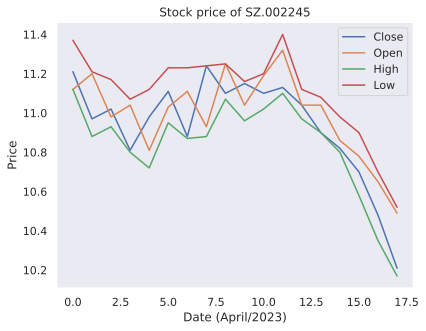

In [4]:
import akshare

df = akshare.stock_zh_a_daily("sz002245", start_date="20230501", end_date="20230530")
df.tail()
close_price = df.to_numpy()[:,4]
open_price = df.to_numpy()[:,1]
high_price = df.to_numpy()[:,2]
low_price = df.to_numpy()[:,3]

fig, ax = plt.subplots()
ax.set(xlabel='Date (April/2023)', ylabel='Price', title='Stock price of SZ.002245')
ax.grid()
ax.plot(np.arange(0, close_price.size), close_price)
ax.plot(np.arange(0, close_price.size), open_price)
ax.plot(np.arange(0, close_price.size), low_price)
ax.plot(np.arange(0, close_price.size), high_price)
ax.legend(['Close', 'Open', 'High', 'Low'])
plt.show()

In [10]:
import cvxpy as cp
import numpy as np

n, p = 3, 3
np.random.seed(1)
C = np.random.randn(n,n)
A, b = [], []
for i in range(p):
    A.append(np.random.randn(n,n ))
    b.append(np.random.randn())

X = cp.Variable((n,n), symmetric=True)
const = [X>>0]
const +=[
    cp.trace(A[i]@X) == b[i] for i in range(p)
]
problem = cp.Problem(cp.Minimize(cp.trace(C@X)), const)
problem.solve()

if problem.status not in ["infeasible", "unbounded"]:
    print(f"The optimal value is {problem.value} with status of {problem.status}")
    print("A solution X is\n", X.value)
    for var in problem.variables():
        print(f"Variable {var.name()}: value\n {var.value}")

The optimal value is 2.654347058555718 with status of optimal
A solution X is
 [[ 1.60805504 -0.59770125 -0.69575821]
 [-0.59770125  0.22228555  0.24689067]
 [-0.69575821  0.24689067  1.39679134]]
Variable var391: value
 [[ 1.60805504 -0.59770125 -0.69575821]
 [-0.59770125  0.22228555  0.24689067]
 [-0.69575821  0.24689067  1.39679134]]
The optimal value is 2.273090892144877 with status of optimal
A solution X is
 [[ 1.60805504 -0.59770125 -0.69575821]
 [-0.59770125  0.22228555  0.24689067]
 [-0.69575821  0.24689067  1.39679134]]
Variable var469: value
 [-0.79269248 -0.15556705  0.25444591 -0.23122745  0.27619613 -0.00696463
  0.12365897 -0.51683913 -0.49502184 -0.1301786  -0.1066267  -0.46815236
 -0.11776596  0.03219278  0.08940674]


In [22]:
import cvxpy as cp
import numpy as np

m, n = 20, 15
np.random.seed(1)
A = np.random.randn(m,n)
b = np.random.randn(m)
x = cp.Variable(n)
cost = cp.sum_squares(x)
problem = cp.Problem(cp.Minimize(cost), constraints=[cp.matmul(A, x) <= b])
problem.solve()
if problem.status not in ["infeasible", "unbounded"]:
    print(f"The optimal value is {problem.value} with status of {problem.status}")
    for var in problem.variables():
        print(f"Variable {var.name()}: value\n {var.value}")
    print(f"The norm of the residual is {cp.norm(A@x-b,p=2).value}")
else:
    print(f"Fail with status of {problem.status}")

The optimal value is 1.0071545800839108 with status of optimal
Variable var819: value
 [ 0.39345767 -0.01641609 -0.2114357   0.38409506 -0.17548387  0.28297915
  0.03666545 -0.2218733  -0.05750409 -0.42523696  0.21751633 -0.21008563
 -0.0809671  -0.10497737 -0.45303393]
The norm of the residual is 5.077269153268928
